<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap08_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
# g = sns.pairplot(iris, hue="species", palette="husl")

In [84]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:, 0:4].values
y = iris.iloc[:,4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

print("훈련용 데이터의 형태: ",X_train.shape)
print("훈련용 데이터 레이블의 형태: ", y_train.shape)
print("테스트용 데이터의 형태: ", X_test.shape)
print("테스용 데이터 레이블의 형태: " ,y_test.shape)

훈련용 데이터의 형태:  (105, 4)
훈련용 데이터 레이블의 형태:  (105, 3)
테스트용 데이터의 형태:  (45, 4)
테스용 데이터 레이블의 형태:  (45, 3)


In [86]:
from keras.models import Sequential
from keras.layers import Dense

# model = Sequential([
#     keras.layers.Flatten(input_shape = (4,)),
#     keras.layers.Dropout(0.2),
#     Dense(64,activation='relu'),
#     Dense(32,activation='relu'),
#     Dense(10,activation='relu'),
#     Dense(3,activation='softmax')
# ])

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [87]:
hist = model.fit(X_train, y_train,batch_size=5, epochs=30, validation_data=(X_test,y_test),validation_split=0.3)

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2 )
print("테스트 정확도:",test_acc)

Epoch 1/30
15/15 [==============================] - 1s 16ms/step - loss: 0.8687 - accuracy: 0.5616 - val_loss: 0.8514 - val_accuracy: 0.5938
Epoch 2/30
15/15 [==============================] - 0s 4ms/step - loss: 0.7077 - accuracy: 0.7397 - val_loss: 0.7337 - val_accuracy: 0.5938
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 0.5811 - accuracy: 0.8904 - val_loss: 0.5982 - val_accuracy: 0.7188
Epoch 4/30
15/15 [==============================] - 0s 6ms/step - loss: 0.5057 - accuracy: 0.7671 - val_loss: 0.5377 - val_accuracy: 0.8438
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 0.4134 - accuracy: 0.8630 - val_loss: 0.4675 - val_accuracy: 0.7812
Epoch 6/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3695 - accuracy: 0.9041 - val_loss: 0.4340 - val_accuracy: 0.7812
Epoch 7/30
15/15 [==============================] - 0s 5ms/step - loss: 0.3536 - accuracy: 0.8219 - val_loss: 0.3933 - val_accuracy: 0.9375
Epoch 8/30
15/15 [=

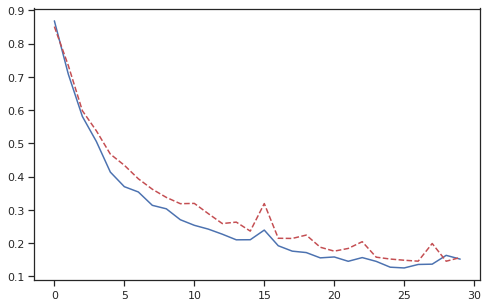

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(hist.history['loss'],'b-')
plt.plot(hist.history['val_loss'],'r--')


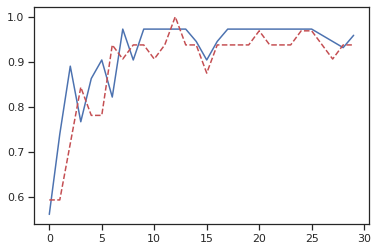

In [89]:
plt.plot(hist.history['accuracy'],'b-')
plt.plot(hist.history['val_accuracy'],'r--')